In [90]:
import numpy as np
import sympy as s
import pandas as pd
import matplotlib.pyplot as plt
from reader import llegeix_dades
from exporter import exporta
from ebola_313 import ebola3
from distancia import distancia as d
import random as rnd

La funció ebola3 rep com a arguments: (c,k,sigma,mu,rnu,ws_inicial,steps,timestep,x,y,vx,vy,escriu = False) i retorna un dataframe de pandas amb totes les dades. Addicionalment se li pot posar un True com a argument addicional si volem que tregui els resultats en un fitxer a la carpeta de fitxers exportats

In [153]:
dades = llegeix_dades()
d1 = dades['1C']
print(len(d1))

1043


In [152]:
p1 = [c1,k1,sigma1,mu1,rnu1,ws1] = [1.5,0.2,1.3,0.002,0.5,2]
factor0 = 20
factor1 = 30
dp1 = [dc1,dk1,dsigma1,dmu1,drnu1,dws1] = [i/factor1 for i in p1]
parametres = ['c','k','sigma','mu', 'rnu', 'ws']
x0 = d1["x"][200]
y0 = d1["y"][200]
vx0 = d1["vx"][200]
vy0 = d1["vy"][200]
g_anterior = 0
g_actual = g(*p1)
print(g_actual,"c1=", c1 ," k1=", k1, " sigma1=", sigma1, " mu1=", mu1, " rnu1=", rnu1, " ws1=", ws1)
while abs(g_anterior - g_actual) > 0.0005:
    g_anterior = g_actual
    rnd.shuffle(parametres)
    p1 = aux1(p1, dp1, parametres, g_anterior)
    g_actual = g(*p1)
    print(g_actual,"c1=", c1 ," k1=", k1, " sigma1=", sigma1, " mu1=", mu1, " rnu1=", rnu1, " ws1=", ws1)
print(g_actual, p1)

0.00316727952395 c= 1.5  k= 0.2  sigma= 1.3  mu= 0.002  rnu= 0.5  ws= 2
0.00316434167791 c1= 1.5  k1= 0.2  sigma1= 1.3  mu1= 0.002  rnu1= 0.5  ws1= 2
0.00332290060578 c= 1.55  k= 0.2  sigma= 1.3  mu= 0.002  rnu= 0.5  ws= 2.0
0.00332290060578 c= 1.55  k= 0.2  sigma= 1.3  mu= 0.002  rnu= 0.5  ws= 2.0
0.0033086140224 c1= 1.5  k1= 0.2  sigma1= 1.3  mu1= 0.002  rnu1= 0.5  ws1= 2
0.0033086140224 [1.55, 0.2, 1.3, 0.002, 0.5, 2.0]


In [140]:
def aux1(p1,dp1,parametres, g_anterior):
    dicc = {'c':0,'k':1,'sigma':2,'mu':3, 'rnu':4, 'ws':5}
    for i in range(6):
        l = dicc[parametres[i]]
        vecm = [p1[j]+dp1[j]*delta(j,l) for j in range(6)]
        if g(*vecm) < g_anterior:
            return vecm
        vecm2 = [p1[j]-dp1[j]*delta(j,l) for j in range(6)]
        if g(*vecm2) < g_anterior:
            return vecm2
    return vec

In [148]:
def g(c0,k0,sigma0,mu0,rnu0,ws0):
    p0 = [c,k,sigma,mu,rnu, ws] = [c0,k0,sigma0,mu0,rnu0,ws0]
    dp0 = [dc0,dk0,dsigma0,dmu0,drnu0,dws0] = [i/factor0 for i in p0]
    fit_anterior = 0
    fit = fitness(c,k,sigma,mu,rnu,ws)
    while abs(fit-fit_anterior) > 0.0005:
        print(fit,"c=", c ," k=", k, " sigma=", sigma, " mu=", mu, " rnu=", rnu, " ws=", ws)
        fit_anterior = fit
        rnd.shuffle(parametres)
        [c,k,sigma,mu,rnu,ws] = aux(*p0, parametres, *dp0, fit_anterior)
        fit = fitness(c,k,sigma,mu,rnu,ws)
    return fit

In [149]:
def fitness(c,k,sigma,mu,rnu,ws):
    return d(ebola3(c, k, sigma, mu, rnu, ws, 200, 1/180, x0, y0, vx0, vy0, 1),d1[200:400].rename(lambda x: x-200))[2]

def delta(i,j):
    if i==j:
        return 1
    return 0

def aux(c,k,sigma,mu,rnu,ws,parametres,dc,dk,dsigma,dmu,drnu,dws,fit_anterior):
    vec = [c,k,sigma,mu,rnu,ws]
    dvec = [dc,dk,dsigma,dmu,drnu,dws]
    dicc = {'c':0,'k':1,'sigma':2,'mu':3, 'rnu':4, 'ws':5}
    for i in range(6):
        l = dicc[parametres[i]]
        vecm = [vec[j]+dvec[j]*delta(j,l) for j in range(6)]
        if fitness(*vecm) < fit_anterior:
            return vecm
        vecm2 = [vec[j]-dvec[j]*delta(j,l) for j in range(6)]
        if fitness(*vecm2) < fit_anterior:
            return vecm2
    return vec

In [111]:
def fer_el_plot(c, k, sigma, mu, rnu, ws, steps = 200, timestep=1/180, x0 = x0, y0 = y0, vx0 = vx0, vy0 = vy0, take=1):
    l = ebola3(c, k, sigma, mu, rnu, ws, steps, timestep, x0, y0, vx0, vy0, 1)
    plt.plot(l['x'],l['y'])
    plt.axis("equal")
    plt.plot(d1[200:400].rename(lambda x: x-200)['x'],d1[200:400].rename(lambda x: x-200)['y'])
    plt.show()

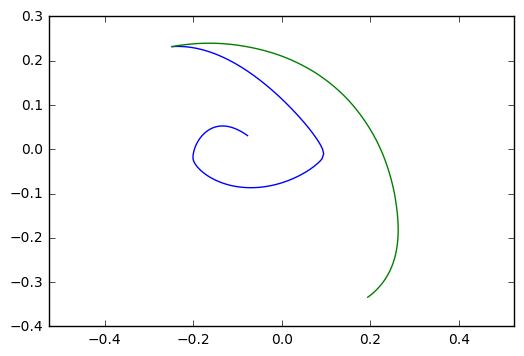

In [114]:
fer_el_plot(2.2,0.4,2.76,0.005,0.4,+3.6)